# Домашнее задание №3

In [103]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set()

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [104]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [105]:
x = data['Direct_Bilirubin']
y = data['Total_Bilirubin']
x_1 = np.array(x).reshape(-1,1)
print(np.shape(x_1))
print(np.shape(y))

(583, 1)
(583,)


In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_1,
    y,
    test_size = 0.2,
    random_state = 3
)

In [108]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
predicted_y = model.predict(X_test)

In [110]:
model.score(X_test, y_test)

0.9185229858613643

In [111]:
model.coef_, model.intercept_

(array([1.96118232]), 0.4331838768322176)

In [112]:
model.predict(10)

array([20.04500708])

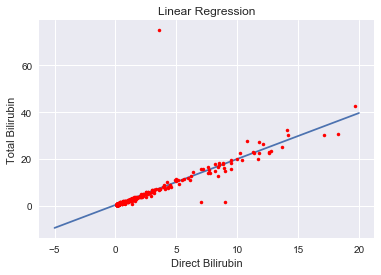

In [113]:
plt.xlabel('Direct Bilirubin')
plt.ylabel('Total Bilirubin')
plt.title('Linear Regression')
x = np.linspace(-5, 20, 100)
y = model.coef_*x + model.intercept_
plt.plot(x, y)
plt.plot(data['Direct_Bilirubin'], data['Total_Bilirubin'], 'r.')
plt.show()

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [114]:
# Полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.9137737205201688

In [115]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [116]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [117]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(value = 0)

In [118]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [119]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.940566,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.327962,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [120]:
data.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [121]:
# Многомерная логистическая регрессия
X = data.drop('Dataset', axis=1)
y = data['Dataset']

In [122]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [123]:
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [124]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          1       0.77      0.97      0.86        88
          2       0.57      0.14      0.22        29

avg / total       0.72      0.76      0.70       117



In [126]:
corr = data.corr()
corr = corr.round(2)
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1,0.06,0.01,0.01,0.08,-0.09,-0.02,-0.19,-0.27,-0.2,-0.14
Gender,0.06,1,0.09,0.1,-0.03,0.08,0.08,-0.09,-0.09,0.01,-0.08
Total_Bilirubin,0.01,0.09,1,0.87,0.21,0.21,0.24,-0.01,-0.22,-0.19,-0.22
Direct_Bilirubin,0.01,0.1,0.87,1,0.23,0.23,0.26,-0,-0.23,-0.19,-0.25
Alkaline_Phosphotase,0.08,-0.03,0.21,0.23,1,0.13,0.17,-0.03,-0.17,-0.22,-0.18
Alamine_Aminotransferase,-0.09,0.08,0.21,0.23,0.13,1,0.79,-0.04,-0.03,0,-0.16
Aspartate_Aminotransferase,-0.02,0.08,0.24,0.26,0.17,0.79,1,-0.03,-0.09,-0.06,-0.15
Total_Protiens,-0.19,-0.09,-0.01,-0,-0.03,-0.04,-0.03,1,0.78,0.22,0.04
Albumin,-0.27,-0.09,-0.22,-0.23,-0.17,-0.03,-0.09,0.78,1,0.65,0.16
Albumin_and_Globulin_Ratio,-0.2,0.01,-0.19,-0.19,-0.22,0,-0.06,0.22,0.65,1,0.15


In [144]:
data_1 = data.drop(columns=['Aspartate_Aminotransferase', 'Direct_Bilirubin'])

In [145]:
X = data_1.drop('Dataset', axis=1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [147]:
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [148]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          1       0.77      0.95      0.85        88
          2       0.50      0.14      0.22        29

avg / total       0.70      0.75      0.70       117



In [157]:
age_comparison = data[['Age','Dataset']]
age_comparison.head()

,Age,Dataset
0,65,1
1,62,1
2,62,1
3,58,1
4,72,1


In [164]:
mask = age_comparison['Age']>=50
mask.head()

0    True
1    True
2    True
3    True
4    True
Name: Age, dtype: bool

In [168]:
age_comparison1, age_comparison2 = age_comparison[mask], age_comparison[~mask]
age_comparison1.head()

,Age,Dataset
0,65,1
1,62,1
2,62,1
3,58,1
4,72,1


In [171]:
age_comparison1.describe()

,Age,Dataset
count,230.000000,230.000000
mean,60.960870,1.239130
std,8.036121,0.427483
min,50.000000,1.000000
25%,55.000000,1.000000
50%,60.000000,1.000000
75%,66.000000,1.000000
max,90.000000,2.000000


In [172]:
age_comparison2.describe()

,Age,Dataset
count,353.000000,353.000000
mean,34.181303,1.317280
std,10.374849,0.466078
min,4.000000,1.000000
25%,27.000000,1.000000
50%,35.000000,1.000000
75%,42.000000,2.000000
max,49.000000,2.000000


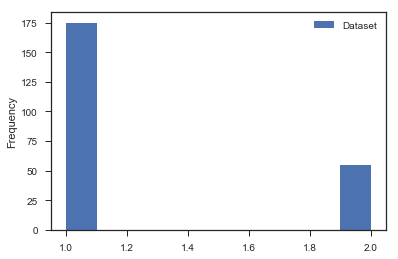

In [176]:
age_comparison1.plot(x='Age', y='Dataset', kind='hist')

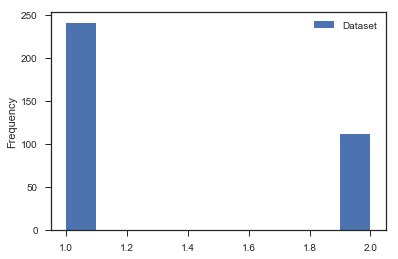

In [174]:
age_comparison2.plot( x='Age', y='Dataset', kind='hist')

In [178]:
sick_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(sick_bilirubin, data['Total_Bilirubin'].mean())
#Есть статистически значительная разница между показателем группы больных людей и выборкой в целом, поскольку pvalue < 0.05

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [180]:
sick_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']
healthy_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_ind(sick_bilirubin, healthy_bilirubin)
# разница между группами статистически значима

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

In [186]:
young = data[data['Age']<=30]['Dataset']
mid_aged = data[data['Age'].between(31, 49)]['Dataset']
mature = data[data['Age']>=50]['Dataset']
stats.f_oneway(young, mid_aged, mature)
# разница между группами статистически значима

F_onewayResult(statistic=8.94859038642867, pvalue=0.0001487412758755181)

Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, сделать сравнение двух моделей по этим классификационным отчетам.

Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

Вопросы задавать на почту yustiks@gmail.com